In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Atomic Values

In [ ]:
'''
The CSV file contains all the values of Atomic Numbers (Z), Theoretical Atomic Mass Numbers (A), and Actual Atomic Mass Numbers (M).
'''

# Load the CSV file

# For Google Colab

#Val = pd.read_csv("/content/drive/MyDrive/atomic_data_all.csv")  

# For Local System

Val = pd.read_csv(r"your_file_location\atomic_data_all.csv")

#print(Val)

Binding Energy

In [8]:
'''
Binding Energy is the minimum energy required to separate a nucleus.
Binding Energy is in the range of MeV or Mega electron volt, which is 1.6 * 10e-13 volts.
'''

# The standard mass units for atoms are defined in amu or Atomic Mass Unit. The unit is written as amu and u as well.

m_p = 1.007276 # u/amu
m_n = 1.008665 # u/amu

Z = Val["Atomic Number (Z)"]
A = Val["Theoretical Atomic Mass Number (A)"]
M = Val["Actual Atomic Mass Number (M)"]


def SEMF(A, Z):
  a_v = 15.8   # Volume term
  a_s = 18.3   # Surface term
  a_c = 0.71   # Coulomb repulsion
  a_a = 23.2   # Asymmetry term
  # a_p --> Pairing term

  # Calculate the pairing term
  a_p = pd.Series(np.zeros_like(A, dtype=float)) # Initialize with zeros
  even_even = (Z % 2 == 0) & ((A - Z) % 2 == 0)
  odd_odd = (Z % 2 == 1) & ((A - Z) % 2 == 1)

  a_p[even_even] = 11.2
  a_p[odd_odd] = -11.2

  # Calculatin Binding Energy with the help of Semi-Empirical Mass Formula
  B_E = a_v * A - a_s * pow(A, 2/3) - a_c * (Z * (Z - 1)) / pow(A, 1/3) - a_a * pow((A - 2 * Z), 2) / A + a_p / pow(A, 1/2)

  B_E[B_E < 0] = 0   # This sets the binding energy of Hydrogen to 0 because the actual atomic mass of Hydrogen is more than the theoretical atomic mass

  return B_E

B_E = SEMF(A, Z)

for i, energy in enumerate(B_E, start=1):
  print(i, energy)

1 0.0
2 21.792345628422282
3 38.09347088876565
4 56.3467320326725
5 74.79255963453684
6 87.61039452997473
7 99.53318155387439
8 123.6234765393639
9 149.51868894330036
10 160.12788200824957
11 186.92599477626342
12 196.73314526312757
13 224.12074074074084
14 233.2203057838131
15 260.99902097851384
16 269.4548205571913
17 297.49058184323957
18 346.9255676720998
19 333.54663197941704
20 340.84277847552937
21 391.00052644367594
22 420.32399145277645
23 445.8810093807264
24 456.06399998998256
25 481.77352859187386
26 491.1805146113423
27 516.9953705615844
28 513.4384409896516
29 559.8200000000002
30 568.6058304167319
31 612.4075441893988
32 639.4894521328847
33 656.700507707528
34 690.0828840494135
35 697.8995790361729
36 733.3841520060389
37 741.1051401111883
38 767.1457208431754
39 774.1941355890917
40 790.4696345823003
41 806.5692076898939
42 832.4523181521432
43 846.07060200037
44 871.6433966558059
45 887.3251912654066
46 912.5647858307918
47 925.8665802901664
48 960.1308763778128
49 98

Binding Energy Graphs

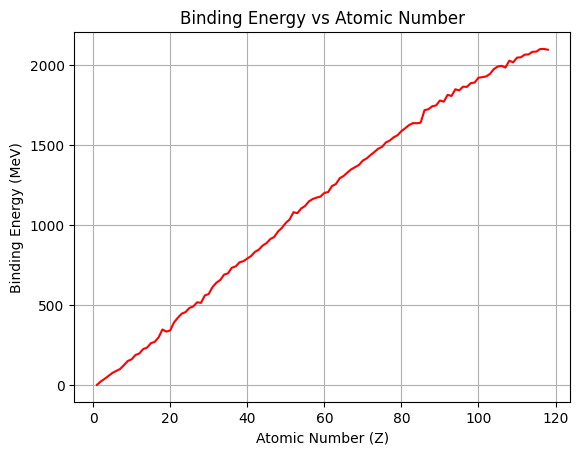

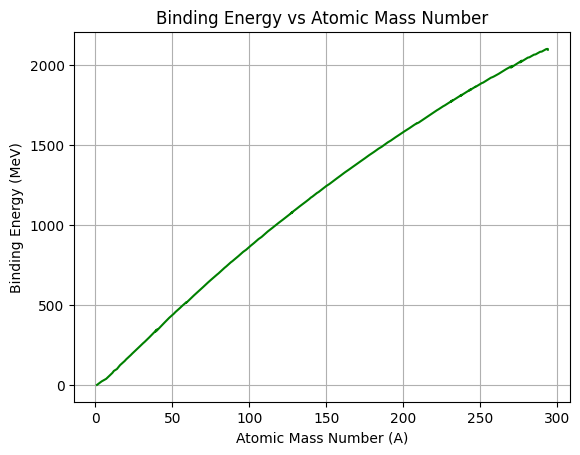

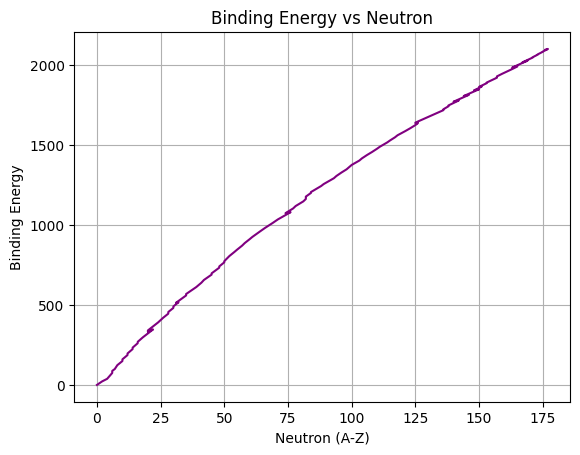

In [9]:
plt.plot(Z, B_E, color='red')
plt.title("Binding Energy vs Atomic Number")
plt.xlabel("Atomic Number (Z)")
plt.ylabel("Binding Energy (MeV)")
plt.grid(True)
plt.show()
plt.plot(A, B_E, color='green')
plt.title("Binding Energy vs Atomic Mass Number")
plt.xlabel("Atomic Mass Number (A)")
plt.ylabel("Binding Energy (MeV)")
plt.grid(True)
plt.show()
plt.plot((A-Z), B_E, color='purple')
plt.title("Binding Energy vs Neutron")
plt.xlabel("Neutron (A-Z)")
plt.ylabel("Binding Energy")
plt.grid(True)
plt.show()

Binding Energy Per Nucleon

In [11]:
'''
Binding Energy per Nucleon is the minimum energy required to separate a single nucleon (proton or neutron).
Binding Energy per Nucleon is in the range of MeV or Mega electron volt, which is 1.6 * 10e-13 volts.
'''

# Binding Energy per Nucleon

B_E_N = (B_E / A)

for i, binding_energy in enumerate(B_E_N, start=1):
  print(i, binding_energy)

1 0.0
2 5.448086407105571
3 5.441924412680807
4 6.260748003630278
5 6.799323603139713
6 7.300866210831227
7 7.109512968133885
8 7.726467283710244
9 7.869404681226335
10 8.006394100412479
11 8.127217164185366
12 8.19721438596365
13 8.300768175582995
14 8.329296635136183
15 8.419323257371413
16 8.420463142412228
17 8.499730909806845
18 8.673139191802495
19 8.552477743061976
20 8.521069461888235
21 8.688900587637242
22 8.756749821932843
23 8.742764889818165
24 8.770461538268895
25 8.759518701670434
26 8.771080618059683
27 8.76263339934889
28 8.702346457451721
29 8.747187500000003
30 8.74778200641126
31 8.748679202705697
32 8.760129481272394
33 8.756006769433707
34 8.735226380372323
35 8.723744737952162
36 8.730763714357606
37 8.718884001308098
38 8.717565009581538
39 8.698810512236985
40 8.6864795009044
41 8.672787179461224
42 8.671378314084825
43 8.633373489799693
44 8.630132640156495
45 8.614807682188413
46 8.609101753120678
47 8.57283870639043
48 8.572597110516186
49 8.543808260662846


Binding Energy Per Nucleon Graph

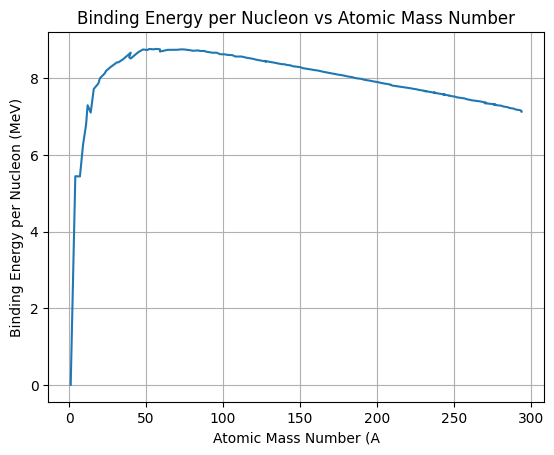

In [12]:
plt.plot(A, B_E_N)
plt.xlabel("Atomic Mass Number (A")
plt.ylabel("Binding Energy per Nucleon (MeV)")
plt.title("Binding Energy per Nucleon vs Atomic Mass Number")
plt.grid(True)
plt.show()